# Learning Analysis

The purpose of this notebook is to document results from training

## Preamble

In [1]:
import pandas as pd
import dill
from collections import Counter
from collections import defaultdict
from matplotlib import pyplot as plt
import dill
import torch
import numpy as np

### Helper Functions

In [2]:
def calc_win_percentage(winner_list, creatures):
    total_games_played = len(winner_list)
    counts = Counter(winner_list)
    win_percentages = {creature: num_wins/total_games_played for creature, num_wins in counts.items()}
    for creature in creatures:
        if creature not in win_percentages.keys():
            win_percentages[creature] = 0
    return win_percentages


def report_actions(state):
    action_names = [
        "end",
        "left",
        "right",
        "up",
        "down",
        "shot",
    ]

    actions = policy_net(state).tolist()[0]
    actions = list(zip(action_names, actions))
    for an, a in actions:
        print("{}: \t{}".format(an, a))
    print("-----{}-----".format(
        action_names[int(torch.argmax(policy_net(state)))]
    ))

### Load Data

## Method Analysis

### Random

Number of games played: 37700


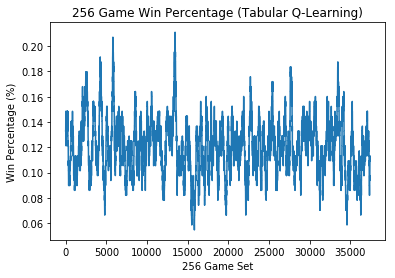

{'Strahd': 0.8797347480106101, 'Leotris': 0.12026525198938992}

In [3]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_random.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) -
               batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### Ranged Aggression

Number of games played: 12000


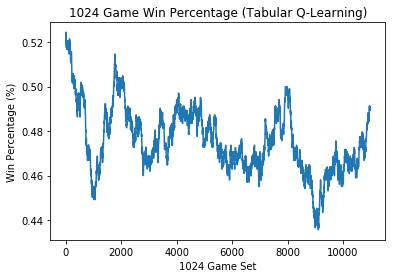

{'Strahd': 0.5225, 'Leotris': 0.4775}

In [4]:
batch_size = 1024
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_ranged_aggression.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### Tabular Q-Learning

Number of games played: 7100


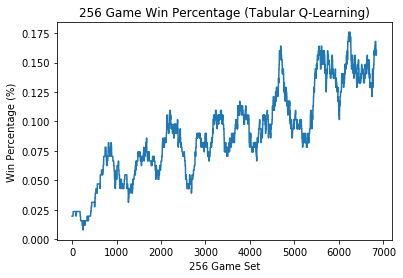

{'Strahd': 0.9094366197183099, 'Leotris': 0.09056338028169014}

In [5]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_q_tabular.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

## Linear Function Approximation

Number of games played: 67600


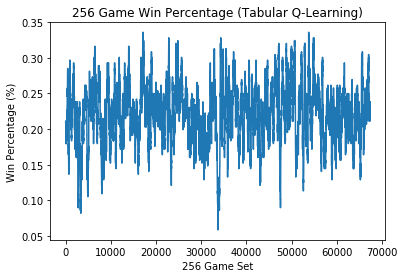

{'Leotris': 0.22146449704142013, 'Strahd': 0.7785355029585799}

In [6]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_linear_function_approximation.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### DQN

Number of games played: 28100


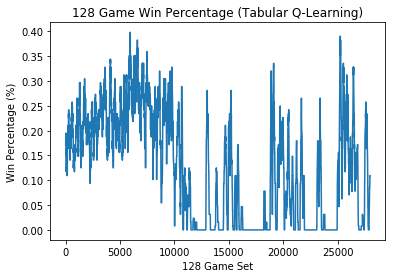

{'Strahd': 0.716049822064057,
 'Leotris': 0.12569395017793594,
 'Timeout': 0.15825622775800713}

In [7]:
batch_size = 128
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_DQN.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

## SARSA

Number of games played: 200


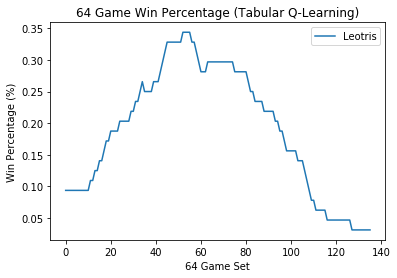

In [9]:
batch_size = 64
win_pcts = defaultdict(list)

creatures = ["Leotris"]

winner_list = dill.load(open("results/winner_list_SARSA.pickle", "rb"))

print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=creatures)
    for creature, batch_win_pct in win_pct.items():
        win_pcts[creature].append(batch_win_pct)
    
for creature in creatures:
    plt.plot(range(len(win_pcts[creature])), win_pcts[creature], label=creature)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))

plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.legend()
plt.show()

### Double DQN:

Number of games played: 2200


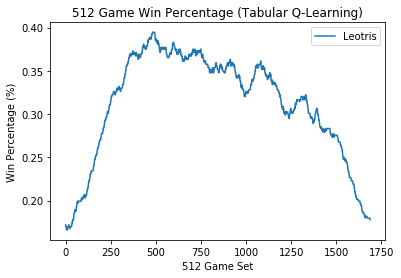

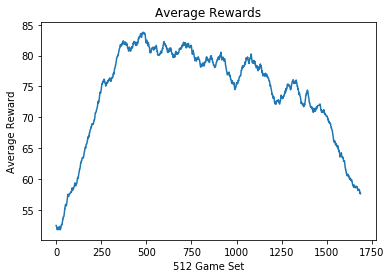

In [179]:
winner_list = dill.load(open("results/winner_list_double_DQN.pickle", "rb"))
reward_list = dill.load(open("results/reward_list_double_DQN.pickle", "rb"))

batch_size = 512
win_pcts = defaultdict(list)
avg_rewards = list()

creatures = ["Leotris"]

print("Number of games played: {}".format(len(winner_list)))

# Graph win percentage:
for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=creatures)
    for creature, batch_win_pct in win_pct.items():
        win_pcts[creature].append(batch_win_pct)
for creature in creatures:
    plt.plot(range(len(win_pcts[creature])), win_pcts[creature], label=creature)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.legend()
plt.show()

# Graph reward:
for i in range(0, len(reward_list) - batch_size):
    batch_reward_list = reward_list[i:(i+batch_size)]
    avg_reward = np.mean(batch_reward_list)
    avg_rewards.append(avg_reward)
    
plt.plot(range(len(avg_rewards)), avg_rewards)
plt.title("Average Rewards")
plt.ylabel("Average Reward")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

## Scratch

In [178]:
policy_net = dill.load(open("results/model_double_DQN.pickle", "rb"))

state = torch.tensor([[
    0.44, # hit points
    1.0, # enemy hit points
    0.8, # x pos
    0.4, # y pos
    0.8, # enemy x
    0.3, # enemy y
    0.0, # attacks used
    1.0, # movement remaining
    0.9, # number steps
]])

report_actions(state)
print()

state = torch.tensor([[
    0.44, # hit points
    1.0, # enemy hit points
    0.8, # x pos
    0.4, # y pos
    0.8, # enemy x
    0.3, # enemy y
    0.0, # attacks used
    0.0, # movement remaining
    0.9, # number steps
]])

report_actions(state)
print()

state = torch.tensor([[
    0.44, # hit points
    1.0, # enemy hit points
    0.8, # x pos
    0.4, # y pos
    0.8, # enemy x
    0.3, # enemy y
    1.0, # attacks used
    0.0, # movement remaining
    0.9, # number steps
]])

report_actions(state)
print()

state = torch.tensor([[
    1.0, # hit points
    0.01, # enemy hit points
    0.8, # x pos
    0.4, # y pos
    0.8, # enemy x
    0.3, # enemy y
    0.0, # attacks used
    1.0, # movement remaining
    0.9, # number steps
]])

report_actions(state)

state = torch.tensor([[
    1.0, # hit points
    0.01, # enemy hit points
    0.8, # x pos
    0.4, # y pos
    0.8, # enemy x
    0.3, # enemy y
    0.0, # attacks used
    0.0, # movement remaining
    0.9, # number steps
]])

report_actions(state)

print()
state = torch.tensor([[
    1.0, # hit points
    0.01, # enemy hit points
    0.8, # x pos
    0.4, # y pos
    0.8, # enemy x
    0.3, # enemy y
    1.0, # attacks used
    0.0, # movement remaining
    0.9, # number steps
]])

report_actions(state)

end: 	18.904123306274414
left: 	19.618709564208984
right: 	19.764995574951172
up: 	19.92682647705078
down: 	19.994131088256836
shot: 	17.875017166137695
-----down-----

end: 	21.16940689086914
left: 	19.485218048095703
right: 	19.542587280273438
up: 	19.163753509521484
down: 	19.42544937133789
shot: 	18.053096771240234
-----end-----

end: 	19.186325073242188
left: 	12.98928451538086
right: 	13.217670440673828
up: 	12.038619995117188
down: 	12.254547119140625
shot: 	10.489324569702148
-----end-----

end: 	44.395023345947266
left: 	48.62391662597656
right: 	48.937278747558594
up: 	50.38752365112305
down: 	48.168548583984375
shot: 	48.129234313964844
-----up-----
end: 	48.07111740112305
left: 	50.020591735839844
right: 	50.20533752441406
up: 	51.13270568847656
down: 	49.07011413574219
shot: 	50.1275634765625
-----up-----

end: 	51.999298095703125
left: 	49.50067138671875
right: 	49.899627685546875
up: 	50.21080017089844
down: 	47.488121032714844
shot: 	48.97975158691406
-----end-----


In [122]:
list(policy_net.parameters())

[Parameter containing:
 tensor([[ 1.3997e+00, -7.7982e+00, -9.6313e-02,  1.3942e-01, -4.6773e-01,
          -1.3668e+00,  5.9265e+00,  9.6252e-04,  8.2890e-01],
         [ 1.1876e+00,  1.3752e+01, -2.7364e-01, -1.8558e-02,  9.6617e-01,
          -7.9669e-01,  4.2511e+00, -1.3793e+00, -8.0601e-01],
         [-1.9486e+00, -1.9937e+01, -1.9800e+00, -3.9388e+00,  7.8781e-01,
          -1.5607e+00,  1.8580e+00,  1.5656e+00,  1.4426e+00],
         [-2.0964e-01,  4.9987e-02, -2.9619e-01,  6.0216e-02,  7.3196e-03,
           2.4845e-01, -2.5499e-01, -2.7240e-01,  1.9529e-01],
         [-3.9171e-01,  1.2790e+01, -1.9213e-01, -4.0982e-02, -1.0764e+00,
           1.0648e-01,  1.7502e+00,  7.1641e-01,  1.5236e+00],
         [ 8.2355e-01, -5.7628e+00, -2.3773e+00, -2.2933e+00, -3.8011e+00,
          -1.1938e+00,  3.5160e-01,  9.5551e-01,  1.4573e+00]],
        requires_grad=True), Parameter containing:
 tensor([ 2.3938,  0.9721, -1.5992, -0.0969,  1.7738,  0.6245],
        requires_grad=True), Para

In [85]:
1 / (0.05 * (1 / 6))

120.0